In [40]:
!pip install prince

# Dimensionality Reduction: MCA & FAMD Assignment

In [41]:
import prince
import pandas as pd

### Import the HR data set 

In [42]:
data_url = 'https://raw.githubusercontent.com/Thinkful-Ed/data-science-lectures/master/hr_dataset.csv'

### Identify which columns in the data are numeric and which are categorical.

Correct any columns that have been misassigned a numeric data type when they should be categorical.

In [43]:
data = pd.read_csv(data_url)
data

,Age,Pay Rate,State,Zip,Sex,MaritalDesc,CitizenDesc,Hispanic/Latino,RaceDesc,Days Employed,Reason For Term,Employment Status,Department,Position,Manager Name,Employee Source,Performance Score
0,30,28.50,MA,1450,Female,Married,US Citizen,No,Black or African American,3317,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Diversity Job Fair,Fully Meets
1,34,23.00,MA,1460,Male,Divorced,US Citizen,No,Black or African American,1420,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Website Banner Ads,Fully Meets
2,31,29.00,MA,2703,Male,Single,US Citizen,No,White,1154,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Internet Search,Fully Meets
3,32,21.50,MA,2170,Female,Married,US Citizen,No,White,58,N/A - still employed,Active,Admin Offices,Administrative Assistant,Brandon R. LeBlanc,Pay Per Click - Google,N/A- too early to review
4,30,16.56,MA,2330,Female,Single,US Citizen,No,White,940,N/A - still employed,Active,Admin Offices,Administrative Assistant,Brandon R. LeBlanc,Website Banner Ads,N/A- too early to review
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,48,52.25,MA,2056,Male,Single,US Citizen,No,Asian,289,N/A - still employed,Active,IT/IS,Senior BI Developer,Brian Champaigne,Indeed,Fully Meets
306,36,51.00,MA,1887,Male,Single,US Citizen,No,Asian,284,N/A - still employed,Active,IT/IS,Senior BI Developer,Brian Champaigne,Indeed,Fully Meets
307,34,46.00,MA,2045,Male,Single,US Citizen,No,White,284,N/A - still employed,Active,IT/IS,BI Developer,Brian Champaigne,Indeed,Fully Meets
308,30,45.00,MA,2134,Male,Married,US Citizen,No,White,220,N/A - still employed,Active,IT/IS,BI Developer,Brian Champaigne,Indeed,Fully Meets


In [44]:
data.dtypes

Age                    int64
Pay Rate             float64
State                 object
Zip                    int64
Sex                   object
MaritalDesc           object
CitizenDesc           object
Hispanic/Latino       object
RaceDesc              object
Days Employed          int64
Reason For Term       object
Employment Status     object
Department            object
Position              object
Manager Name          object
Employee Source       object
Performance Score     object
dtype: object

In [45]:
data['Zip'] = data['Zip'].map(lambda x: str(x))
data.dtypes

Age                    int64
Pay Rate             float64
State                 object
Zip                   object
Sex                   object
MaritalDesc           object
CitizenDesc           object
Hispanic/Latino       object
RaceDesc              object
Days Employed          int64
Reason For Term       object
Employment Status     object
Department            object
Position              object
Manager Name          object
Employee Source       object
Performance Score     object
dtype: object

### Pull out the categorical variables and note the dimensions of the data set.

In [46]:
df = data.select_dtypes(include=['object'])
df

,State,Zip,Sex,MaritalDesc,CitizenDesc,Hispanic/Latino,RaceDesc,Reason For Term,Employment Status,Department,Position,Manager Name,Employee Source,Performance Score
0,MA,1450,Female,Married,US Citizen,No,Black or African American,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Diversity Job Fair,Fully Meets
1,MA,1460,Male,Divorced,US Citizen,No,Black or African American,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Website Banner Ads,Fully Meets
2,MA,2703,Male,Single,US Citizen,No,White,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Internet Search,Fully Meets
3,MA,2170,Female,Married,US Citizen,No,White,N/A - still employed,Active,Admin Offices,Administrative Assistant,Brandon R. LeBlanc,Pay Per Click - Google,N/A- too early to review
4,MA,2330,Female,Single,US Citizen,No,White,N/A - still employed,Active,Admin Offices,Administrative Assistant,Brandon R. LeBlanc,Website Banner Ads,N/A- too early to review
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,MA,2056,Male,Single,US Citizen,No,Asian,N/A - still employed,Active,IT/IS,Senior BI Developer,Brian Champaigne,Indeed,Fully Meets
306,MA,1887,Male,Single,US Citizen,No,Asian,N/A - still employed,Active,IT/IS,Senior BI Developer,Brian Champaigne,Indeed,Fully Meets
307,MA,2045,Male,Single,US Citizen,No,White,N/A - still employed,Active,IT/IS,BI Developer,Brian Champaigne,Indeed,Fully Meets
308,MA,2134,Male,Married,US Citizen,No,White,N/A - still employed,Active,IT/IS,BI Developer,Brian Champaigne,Indeed,Fully Meets


### Reduce these categorical features down to two dimensions using MCA.

In [47]:
mca = prince.MCA()
mca.fit(df)
coordinates = mca.transform(df)
coordinates

,0,1
0,0.077380,0.173865
1,0.304728,0.192966
2,0.122619,0.287722
3,0.030727,0.085923
4,0.264967,0.078459
...,...,...
305,-0.008302,1.946421
306,-0.039595,1.603315
307,-0.009573,1.540043
308,-0.030544,1.730497


### Plot the coordinates of each resulting dimension.

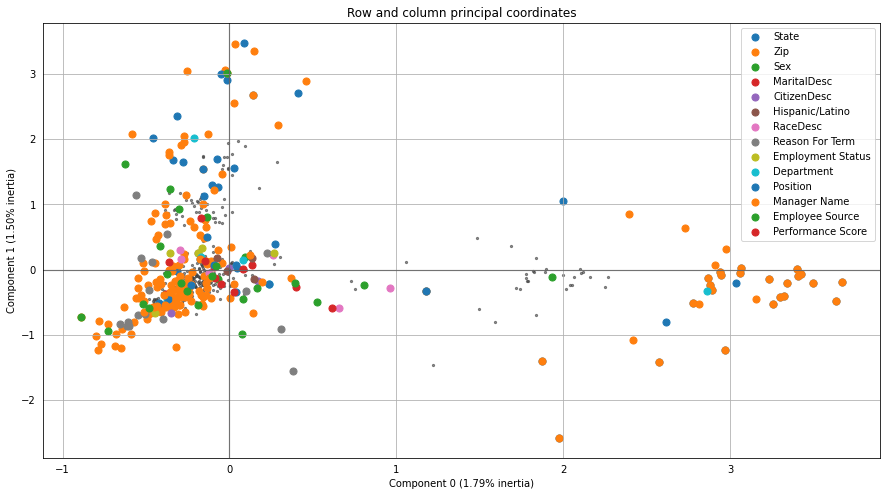

In [48]:
import matplotlib.pyplot as plt
mca.plot_coordinates(
    X=df,
    ax=None,
    figsize=(15,8),
    row_points_size=5,
    show_row_points=True,
    show_row_labels=False,
    show_column_points=True,
    column_points_size=50,
    show_column_labels=False,
)
plt.show()

### One hot encode the categorical features and note the change in dimensions in the data set.

In [49]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(drop='first').fit_transform(df)
df1 = enc.toarray()
ca = prince.CA()
ca.fit(df1)
coordinates = ca.transform(df1)
coordinates

,0,1
0,-0.004763,0.070349
1,0.359191,0.147359
2,0.022701,0.211371
3,-0.008832,-0.008928
4,0.269485,-0.001943
...,...,...
305,-0.163814,2.035049
306,-0.178615,1.648876
307,-0.137716,1.556022
308,-0.166268,1.753181


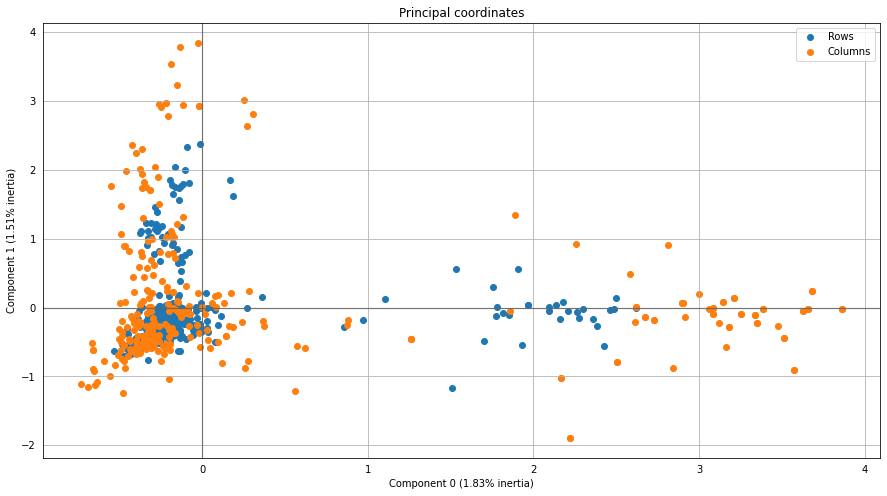

In [50]:
ca.plot_coordinates(
    X=df1,
    ax=None,
    figsize=(15,8),
    show_row_labels=False,
    show_col_labels=False,
)
plt.show()

### Use FAMD to reduce the entire data set (both the categorical and numeric features) down to two dimensions.

In [51]:
famd = prince.FAMD()
famd.fit(data)
coordinates = famd.transform(data)

### Plot the coordinates of each resulting dimension, color-coding the plot points according to Employment Status.

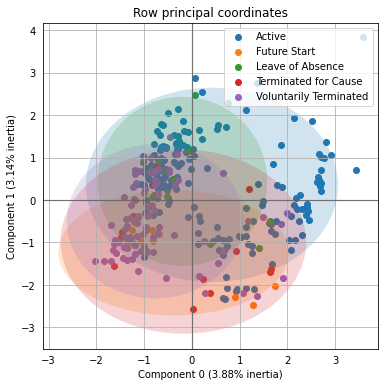

In [52]:
famd.plot_row_coordinates(
    data,
    color_labels=data['Employment Status'],
    ellipse_fill=True,
)
plt.show()